In [9]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
%matplotlib inline

In [10]:
df = pd.read_excel('Book1.xlsx')
df['y'] = np.log(df['y'])
df.head()

,ds,y
0,2016-12-25,6.835185
1,2016-12-26,7.257003
2,2016-12-27,7.482682
3,2016-12-28,7.557473
4,2016-12-29,7.515889


In [11]:
m = Prophet()
m.fit(df);

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
401,2018-01-30
402,2018-01-31
403,2018-02-01
404,2018-02-02
405,2018-02-03


In [13]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
401,2018-01-30,8.933908,-9.226073,27.270959
402,2018-01-31,8.940499,-9.333096,27.287964
403,2018-02-01,8.863715,-9.408605,27.437355
404,2018-02-02,8.671885,-9.787137,27.369677
405,2018-02-03,8.192248,-10.174140,26.973095


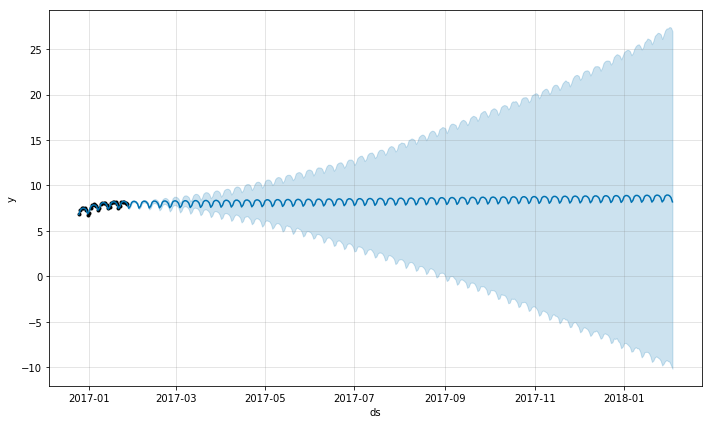

In [14]:
m.plot(forecast);

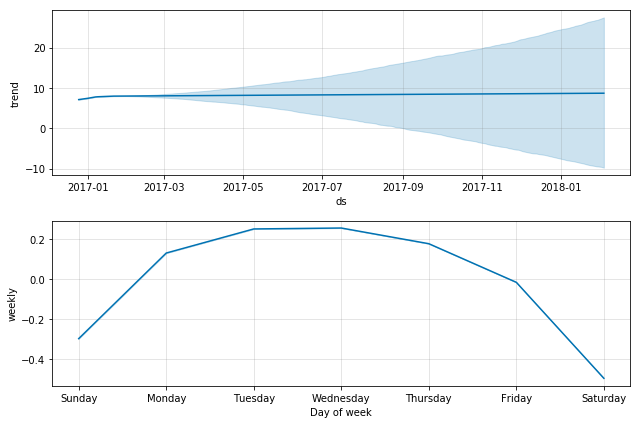

In [15]:
m.plot_components(forecast);

In [17]:
df.to_excel('forecast.xlsx')

In [18]:
forecast.to_excel('f1.xlsx')